In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.6.0+cu124'

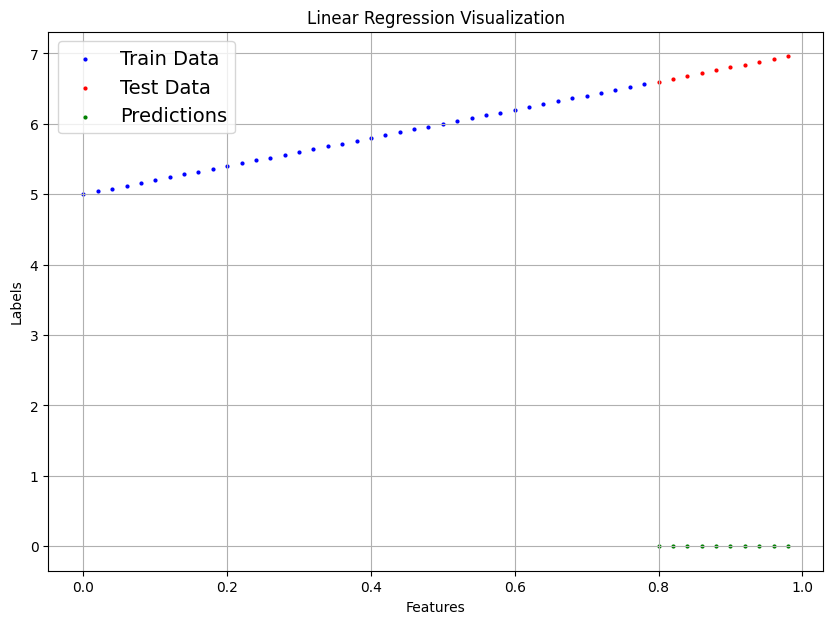

In [54]:
import torch
import matplotlib.pyplot as plt

# STEP 1: CREATE INPUTS AND OUTPUTS
wt = 2
bias = 5

x = torch.arange(0, 1, 0.02).unsqueeze(dim=1)  # Created Inputs
y = wt * x + bias                             # Created Outputs

# STEP 2: SPLIT INTO TRAINING AND TEST SET
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

# Dummy predictions (placeholder same shape as y_test)
predictions = torch.zeros_like(y_test)

# STEP 3: PLOTTING FUNCTION
def plot(train_data=x_train, train_labels=y_train,
         test_data=x_test, test_labels=y_test,
         predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Train Data")
    plt.scatter(test_data, test_labels, c='r', s=4, label="Test Data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")
    plt.legend(prop={"size": 14})
    plt.xlabel("Features")
    plt.ylabel("Labels")
    plt.title("Linear Regression Visualization")
    plt.grid(True)
    plt.show()

# Call the function and pass predictions
plot(predictions=predictions)


In [20]:
#STEP 4 CREATING A MODEL
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weight*x+self.bias

# STEP 5 CHECKING CONTENTS IN MODEL

torch.manual_seed(42)
model_0= LinearRegression()
model_0.state_dict()


#STEP 6 IDEAL VALUES
weight=20
bias=5

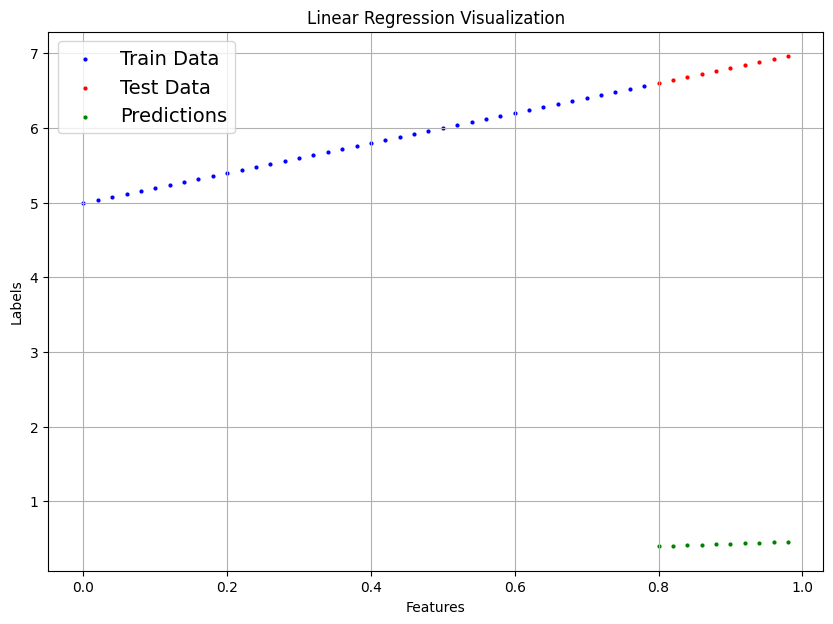

In [55]:
#STEP 7 MAKING PREDICTIONS
with torch.inference_mode():
  predictions=model_0(x_test)
plot(predictions=predictions)